<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/project_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and download data

In [728]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from tensorflow.keras.models import Sequential
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [729]:
#download data(tesla)
tsla = yf.download("TSLA",start="2020-01-01",end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [730]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1258 non-null   float64
 1   (High, TSLA)    1258 non-null   float64
 2   (Low, TSLA)     1258 non-null   float64
 3   (Open, TSLA)    1258 non-null   float64
 4   (Volume, TSLA)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [731]:
tsla.columns = [col[0] for col in tsla.columns]

In [732]:
tsla

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800


In [733]:
#tsla.reset_index(inplace=True)

In [734]:
tsla.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [735]:
#tsla['Date']=pd.to_datetime(tsla['Date'])

In [736]:
tsla

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800


In [737]:
# יצירת תשואה יומית
tsla['Daily_Return'] = tsla['Close'].pct_change()

# יצירת עמודת יעד (1 אם התשואה חיובית, 0 אחרת)
tsla['Target'] = (tsla['Daily_Return'] > 0).astype(int)

# הסרת שורות עם ערכים חסרים
tsla.dropna(inplace=True)


#Statistical data

In [738]:
# Find max and min points

max_idx = tsla['Close'].idxmax()
min_idx = tsla['Close'].idxmin()
max_date = tsla.loc[max_idx, 'Date']
min_date = tsla.loc[min_idx, 'Date']
max_price = tsla.loc[max_idx, 'Close']
min_price = tsla.loc[min_idx, 'Close']

# Plotting TSLA closing price over the year

plt.figure(figsize=(12,6))
plt.plot(tsla['Date'], tsla['Close'], label='Closing Price', color='cornflowerblue')
plt.scatter(max_date, max_price, color='green', label=f'Max: {max_price:.2f}', zorder=5)
plt.scatter(min_date, min_price, color='red', label=f'Min: {min_price:.2f}', zorder=5)

plt.title('TSLA Closing Price Trend (2022-07-04 to 2023-07-04)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'Date'

In [739]:
#Descriptive statistics
tsla[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,213.629850,218.434725,208.502560,213.577896,1.255160e+08
std,83.496676,85.262753,81.408309,83.331672,8.211824e+07
min,24.980000,26.990667,23.367332,24.081333,2.940180e+07
25%,173.919998,177.350006,170.149994,173.949997,7.600980e+07
50%,220.949997,225.399994,215.356674,220.250000,1.019853e+08
75%,259.290009,264.980011,254.529999,260.019989,1.454174e+08
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08


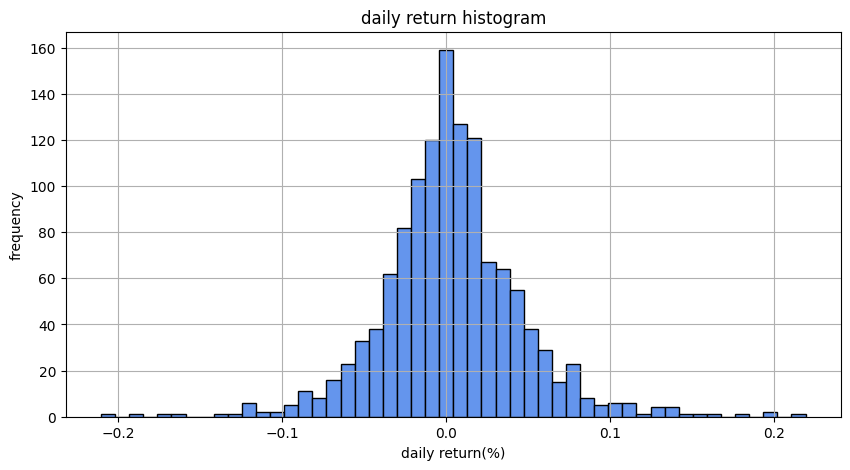

In [740]:
#graph 3 : daily return (percentage)
tsla['daily return'] = tsla['Close'].pct_change()
#histogram
plt.figure(figsize=(10,5))
plt.hist(tsla['daily return'].dropna(),bins=50,color='cornflowerblue',edgecolor = 'black')
plt.title('daily return histogram')
plt.xlabel('daily return(%)')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

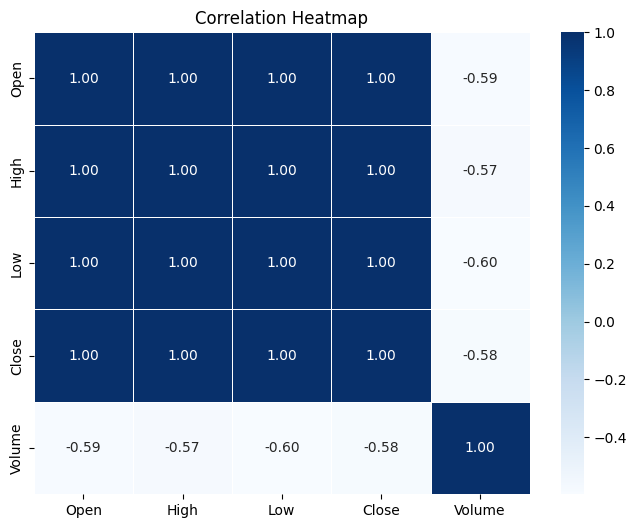

In [741]:
#correlation matrix
correlation_matrix = tsla[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [742]:
tsla['daily return'].describe()

,daily return
count,1256.000000
mean,0.002976
std,0.042331
min,-0.210628
25%,-0.020054
50%,0.001871
75%,0.023761
max,0.219190


In [743]:
tsla['return_residual'] = tsla['daily return'] - tsla['daily return'].mean()

In [744]:
tsla['return_residual']

,return_residual
Date,
2020-01-03,NaN
2020-01-06,0.016278
2020-01-07,0.035824
2020-01-08,0.046229
2020-01-09,-0.024921
...,...
2024-12-24,0.070596
2024-12-26,-0.020606
2024-12-27,-0.052455


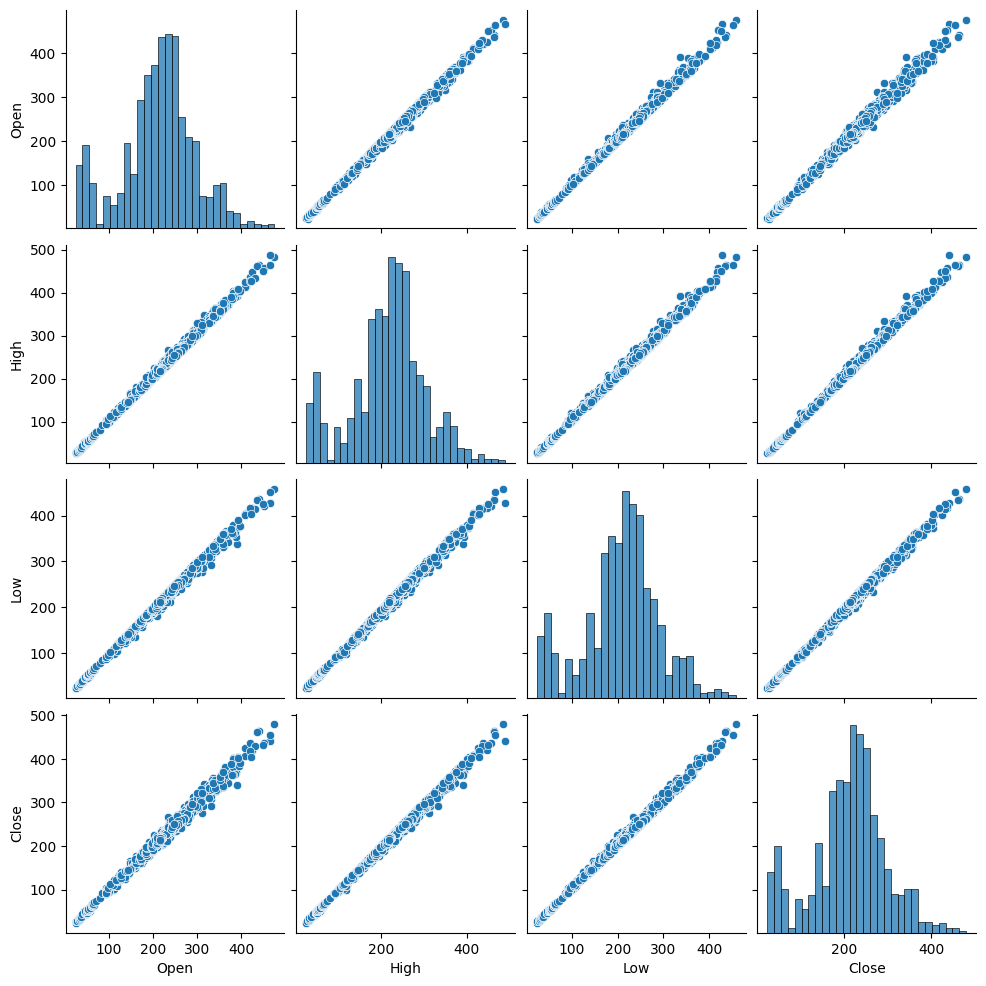

In [745]:
# Pairplot of numerical columns
sns.pairplot(tsla[['Open', 'High', 'Low', 'Close']])

#EDA

In [746]:
pd.concat([tsla["Close"],
          tsla["Close"].shift(-1),
          tsla["Close"].shift(+1)],
          keys = ["Close","TMW","Yesterdy"],axis=1).head()

,Close,TMW,Yesterdy
Date,,,
2020-01-03,29.534000,30.102667,NaN
2020-01-06,30.102667,31.270666,29.534000
2020-01-07,31.270666,32.809334,30.102667
2020-01-08,32.809334,32.089333,31.270666
2020-01-09,32.089333,31.876667,32.809334


In [747]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

In [748]:
tsla.loc[tsla["Close Change"]>0,"label"]=1
tsla.loc[tsla["Close Change"]<0,"label"] = -1

In [749]:
#tsla = tsla.dropna(subset=['Close Change'])

In [750]:
tsla.drop(columns=['daily return','return_residual'],inplace=True)

In [751]:
#tsla.set_index('Date', inplace=True)

In [752]:
tsla

,Close,High,Low,Open,Volume,Daily_Return,Target,Close Change,label
Date,,,,,,,,,
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,0.029633,1,0.568666,1.0
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,0.019255,1,1.167999,1.0
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,0.038801,1,1.538668,1.0
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,0.049205,1,-0.720001,-1.0
2020-01-09,32.089333,33.253334,31.524668,33.139999,426606000,-0.021945,0,-0.212666,-1.0
...,...,...,...,...,...,...,...,...,...
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,0.073572,1,-8.149994,-1.0
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,-0.017630,0,-22.470001,-1.0
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,-0.049479,0,-14.250000,-1.0


In [753]:
tsla.dropna(inplace=True)

In [754]:
tsla['label'].value_counts(normalize=True)

,proportion
label,
1.0,0.530677
-1.0,0.469323


#Classic model - Logistic Regression

In [755]:
# בחירת עמודות פיצ'ר
X = tsla[['Open', 'High', 'Low', 'Close', 'Volume']]

# עמודת יעד
y = tsla['Target']


In [720]:
#Defining features and target
#X= tsla.drop(['label','Close Change'],axis=1)
#y=tsla['label']

In [757]:
print(y.isnull().sum())

0


In [758]:
#split train & test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [759]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [760]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [761]:
# Initialize results list
results = []

# Loop over models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)

    # Append to results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Confusion Matrix": conf
    })

In [762]:
results_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])
results_df.sort_values(by='F1-score', ascending=False)


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.776892,0.738854,0.885496,0.805556
3,SVM,0.669323,0.642857,0.824427,0.722408
1,Random Forest,0.713147,0.736000,0.702290,0.718750
2,Decision Tree,0.633466,0.636364,0.694656,0.664234
4,KNN,0.605578,0.626984,0.603053,0.614786


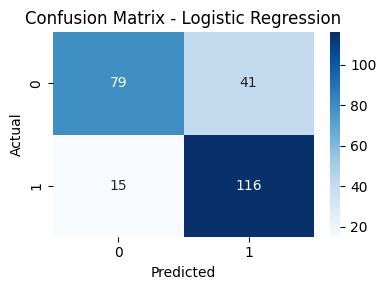

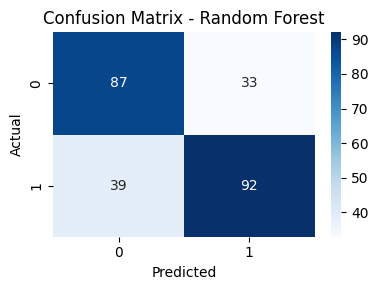

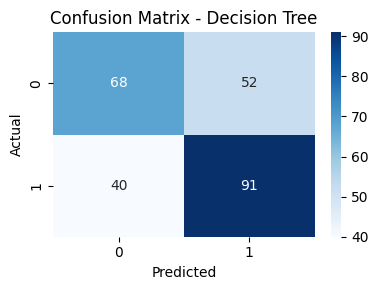

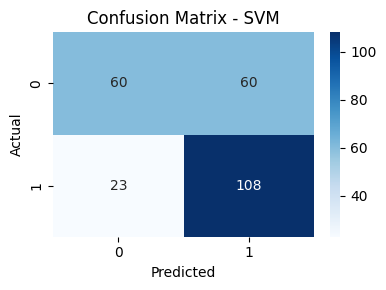

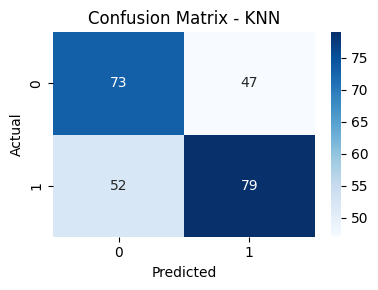

In [763]:
import matplotlib.pyplot as plt
import seaborn as sns

for result in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


#LSTM

In [460]:
seasonal_result = seasonal_decompose(tsla['Close'], model ='additive',period=12*4)

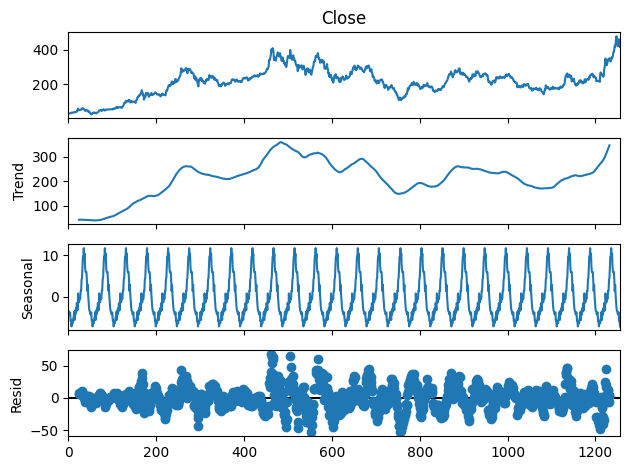

In [461]:
seasonal_result.plot()
plt.tight_layout()
plt.show()

#למחוק בהמשך

In [133]:
#model 1 - Logistic Regression
model1=LogisticRegression()
model1.fit(X_train_scaled,y_train)
y_pred1=model1.predict(X_test_scaled)
acc1=accuracy_score(y_test,y_pred1)
prec1=precision_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
f1_1=f1_score(y_test,y_pred1)
confusion_matrix1=confusion_matrix(y_test,y_pred1)

#model 2 - RandomForest
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(X_train_scaled,y_train)
y_pred2=model2.predict(X_test_scaled)
acc2=accuracy_score(y_test,y_pred2)
prec2=precision_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
f1_2=f1_score(y_test,y_pred2)
confusion_matrix2=confusion_matrix(y_test,y_pred2)
#הצגת תוצאות
print("logistic regression:")
print(f"Accuracy:{acc1:.2f}")
print(f"precision:{prec1:.2f}")
print(f"recall:{rec1:.2f}")
print(f"f1-score:{f1_1:.2f}")
print(f"confusion_matrix:\n{confusion_matrix1}")
print("RandomForest:")
print(f"Accuracy:{acc2:.2f}")
print(f"Precision:{prec2:.2f}")
print(f"Recall:{rec2:.2f}")
print(f"f1-score:{f1_2:.2f}")
print(f"confusion_matrix:\n{confusion_matrix2}")

logistic regression:
Accuracy:0.52
precision:0.50
recall:0.92
f1-score:0.65
confusion_matrix:
[[ 4 22]
 [ 2 22]]
RandomForest:
Accuracy:0.44
Precision:0.43
Recall:0.54
f1-score:0.48
confusion_matrix:
[[ 9 17]
 [11 13]]


In [63]:
comparison = pd.DataFrame({
    "Date":y_test.index,
    "Actual":y_test.values,
    "Logistic Prediction" : y_pred1,
    "RandoForest Prediction" : y_pred2
    #"Logistic Correct"=comparison["Actual"]==comparison["Logistic Prediction"]
})

In [64]:
comparison

,Date,Actual,Logistic Prediction,RandoForest Prediction
0,2022-08-22,1.0,1.0,1.0
1,2022-07-14,1.0,1.0,1.0
2,2023-03-28,1.0,1.0,1.0
3,2022-11-04,-1.0,-1.0,-1.0
4,2023-02-17,-1.0,-1.0,-1.0
5,2023-06-29,1.0,1.0,1.0
6,2023-04-17,-1.0,-1.0,-1.0
7,2022-12-02,-1.0,-1.0,-1.0
8,2022-07-19,1.0,1.0,1.0
9,2023-06-13,-1.0,-1.0,-1.0


In [68]:
#plt.figure(figsize=(12,5))
#plt.plot(y_test.reset_index(drop=True),label='Actual',linewidth=2)

#lstm